In [320]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    

In [321]:
kle = pd.read_csv('data/Life Expectancy Data.csv')

In [322]:
kle.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,...,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,Afghanistan,2014,Developing,59.90,271.00,64,0.01,73.52,62.00,492,...,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,Afghanistan,2013,Developing,59.90,268.00,66,0.01,73.22,64.00,430,...,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,Afghanistan,2012,Developing,59.50,272.00,69,0.01,78.18,67.00,2787,...,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,Afghanistan,2011,Developing,59.20,275.00,71,0.01,7.10,68.00,3013,...,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50


In [323]:
kle.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [324]:
kle.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [325]:
kle.drop(columns='Adult_mortality', inplace=True)

In [326]:
kle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Infant_deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   Percentage_expenditure           2938 non-null   float64
 7   HepatitisB                       2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  Under_five_deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total_expenditure   

In [327]:
encoder = LabelEncoder()

In [328]:
kle.Country = encoder.fit_transform(kle.Country)
# kle.Year = encoder.fit_transform(kle.Year)
kle.Status = encoder.fit_transform(kle.Status)

In [329]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(kle), columns=kle.columns)
df.head()

,Country,Year,Status,Life_expectancy,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.00,1.00,1.00,0.54,0.03,0.00,0.00,0.65,0.01,0.21,...,0.03,0.45,0.65,0.00,0.00,0.03,0.62,0.60,0.51,0.49
1,0.00,0.93,1.00,0.45,0.04,0.00,0.00,0.62,0.00,0.20,...,0.57,0.45,0.62,0.00,0.01,0.00,0.63,0.61,0.50,0.48
2,0.00,0.87,1.00,0.45,0.04,0.00,0.00,0.64,0.00,0.20,...,0.61,0.45,0.64,0.00,0.01,0.02,0.64,0.62,0.50,0.48
3,0.00,0.80,1.00,0.44,0.04,0.00,0.00,0.67,0.01,0.19,...,0.67,0.47,0.67,0.00,0.01,0.00,0.64,0.63,0.49,0.47
4,0.00,0.73,1.00,0.43,0.04,0.00,0.00,0.68,0.01,0.19,...,0.68,0.44,0.68,0.00,0.00,0.00,0.66,0.64,0.48,0.46


In [330]:
df.Year.unique()

array([1.        , 0.93333333, 0.86666667, 0.8       , 0.73333333,
       0.66666667, 0.6       , 0.53333333, 0.46666667, 0.4       ,
       0.33333333, 0.26666667, 0.2       , 0.13333333, 0.06666667,
       0.        ])

In [331]:
kle.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

### Imputing with KNN (missing values get replaced by the nearest neighbor estimated values)

In [332]:
len(df.Country.unique())

193

In [333]:
print('Pre na qty: ' + str(df.isnull().sum()))

Pre na qty: Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [334]:
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [335]:
df2.tail()

,Country,Year,Status,Life_expectancy,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
2933,1.00,0.27,1.00,0.15,0.01,0.24,0.00,0.68,0.00,0.30,...,0.67,0.39,0.65,0.66,0.00,0.01,0.34,0.33,0.43,0.44
2934,1.00,0.20,1.00,0.16,0.01,0.23,0.00,0.06,0.00,0.30,...,0.04,0.36,0.68,0.72,0.00,0.01,0.35,0.34,0.44,0.46
2935,1.00,0.13,1.00,0.16,0.01,0.25,0.00,0.73,0.00,0.29,...,0.73,0.36,0.71,0.79,0.00,0.00,0.04,0.04,0.45,0.48
2936,1.00,0.07,1.00,0.17,0.01,0.10,0.00,0.77,0.00,0.29,...,0.76,0.34,0.75,0.83,0.00,0.01,0.05,0.06,0.45,0.47
2937,1.00,0.00,1.00,0.18,0.01,0.09,0.00,0.80,0.01,0.28,...,0.78,0.39,0.78,0.86,0.00,0.01,0.39,0.39,0.46,0.47


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

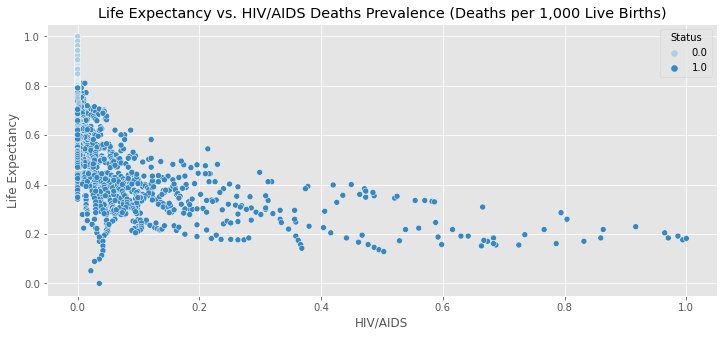

In [336]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('HIV/AIDS', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. HIV/AIDS Deaths Prevalence (Deaths per 1,000 Live Births)')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

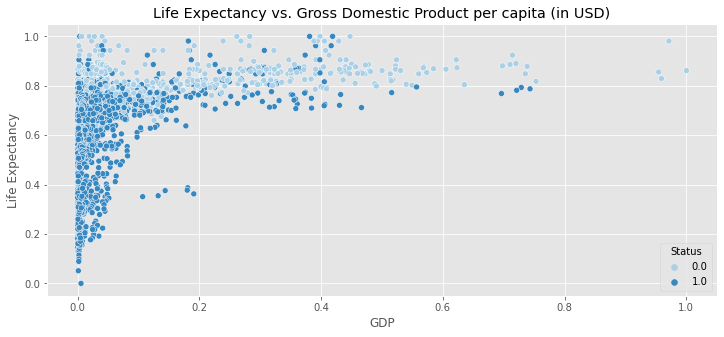

In [337]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('GDP', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Gross Domestic Product per capita (in USD)')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

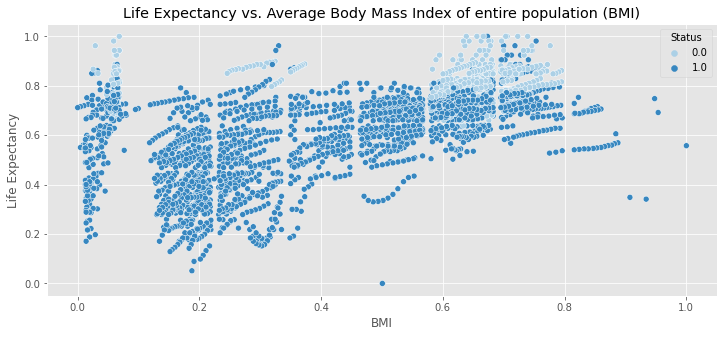

In [338]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('BMI', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Average Body Mass Index of entire population (BMI)')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

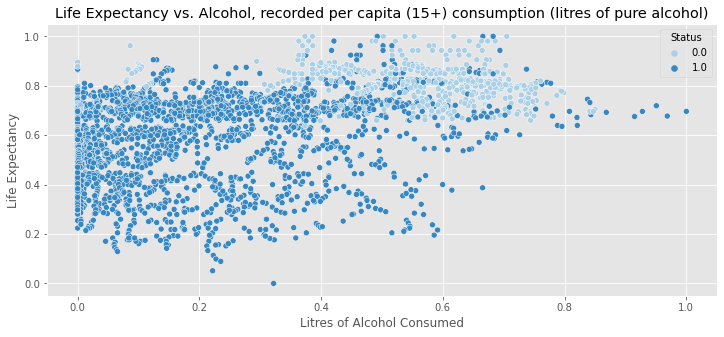

In [339]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Alcohol', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Alcohol, recorded per capita (15+) consumption (litres of pure alcohol)')
plt.xlabel('Litres of Alcohol Consumed')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

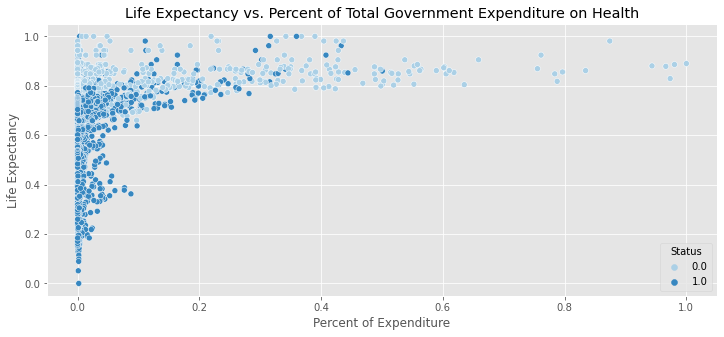

In [340]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Percentage_expenditure', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Percent of Total Government Expenditure on Health')
plt.xlabel('Percent of Expenditure')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

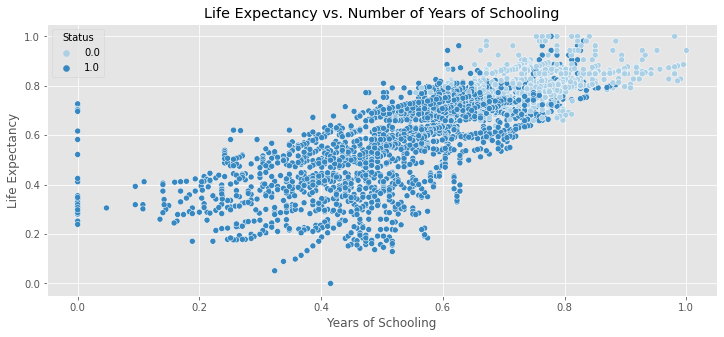

In [341]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Schooling', 'Life_expectancy', data=df2, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Number of Years of Schooling')
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy')

Removing Outliers

<AxesSubplot:xlabel='Life_expectancy'>

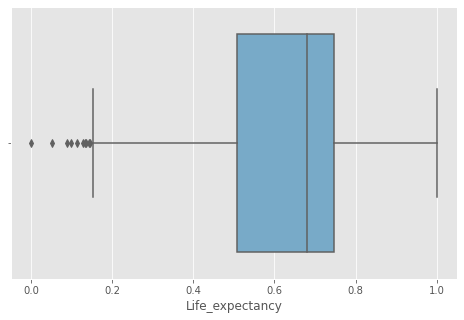

In [342]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x=df2['Life_expectancy'], palette='Blues')


In [343]:
print('Pre Outliers shape: ', df2.shape)

Pre Outliers shape:  (2938, 21)


In [344]:
df2

,Country,Year,Status,Life_expectancy,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.00,1.00,1.00,0.54,0.03,0.00,0.00,0.65,0.01,0.21,...,0.03,0.45,0.65,0.00,0.00,0.03,0.62,0.60,0.51,0.49
1,0.00,0.93,1.00,0.45,0.04,0.00,0.00,0.62,0.00,0.20,...,0.57,0.45,0.62,0.00,0.01,0.00,0.63,0.61,0.50,0.48
2,0.00,0.87,1.00,0.45,0.04,0.00,0.00,0.64,0.00,0.20,...,0.61,0.45,0.64,0.00,0.01,0.02,0.64,0.62,0.50,0.48
3,0.00,0.80,1.00,0.44,0.04,0.00,0.00,0.67,0.01,0.19,...,0.67,0.47,0.67,0.00,0.01,0.00,0.64,0.63,0.49,0.47
4,0.00,0.73,1.00,0.43,0.04,0.00,0.00,0.68,0.01,0.19,...,0.68,0.44,0.68,0.00,0.00,0.00,0.66,0.64,0.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.00,0.27,1.00,0.15,0.01,0.24,0.00,0.68,0.00,0.30,...,0.67,0.39,0.65,0.66,0.00,0.01,0.34,0.33,0.43,0.44
2934,1.00,0.20,1.00,0.16,0.01,0.23,0.00,0.06,0.00,0.30,...,0.04,0.36,0.68,0.72,0.00,0.01,0.35,0.34,0.44,0.46
2935,1.00,0.13,1.00,0.16,0.01,0.25,0.00,0.73,0.00,0.29,...,0.73,0.36,0.71,0.79,0.00,0.00,0.04,0.04,0.45,0.48
2936,1.00,0.07,1.00,0.17,0.01,0.10,0.00,0.77,0.00,0.29,...,0.76,0.34,0.75,0.83,0.00,0.01,0.05,0.06,0.45,0.47


<AxesSubplot:>

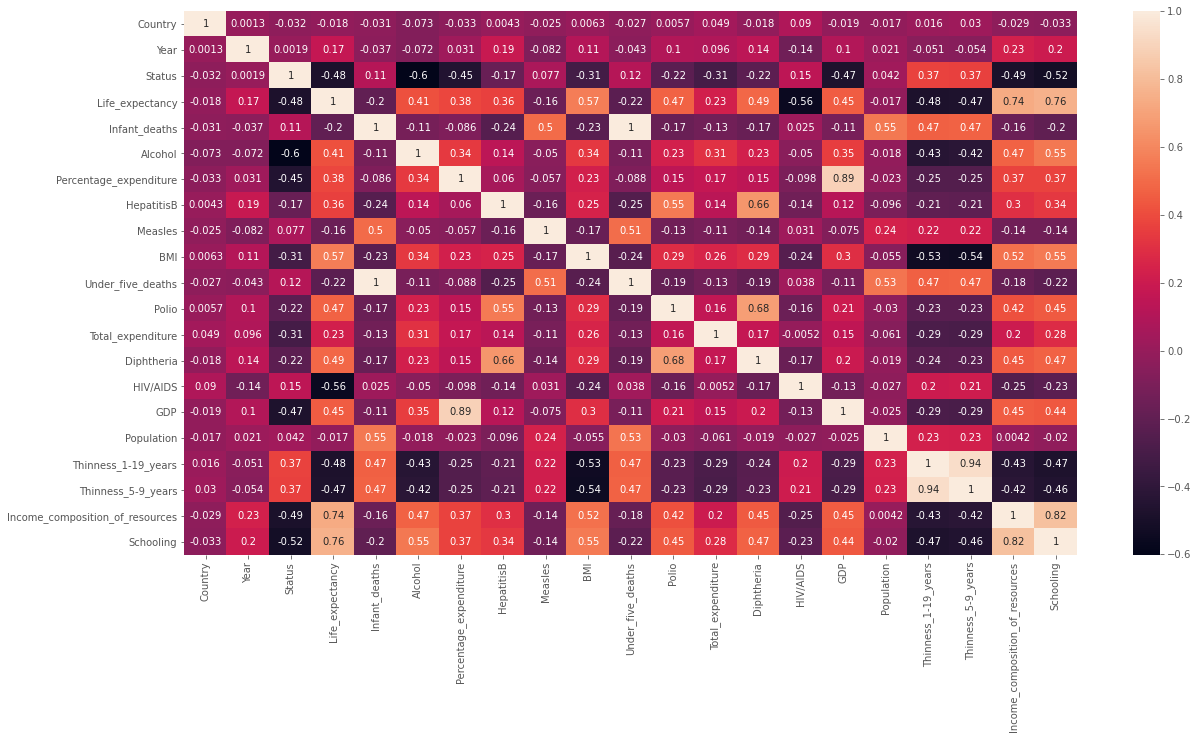

In [345]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df2.corr(), annot=True, ax=ax)

In [346]:
kle_labels = df2['Life_expectancy']

In [348]:
kle_features = df2.drop(['Life_expectancy'], axis=1)

In [353]:
kle_features

,Country,Year,Status,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.00,1.00,1.00,0.03,0.00,0.00,0.65,0.01,0.21,0.03,0.03,0.45,0.65,0.00,0.00,0.03,0.62,0.60,0.51,0.49
1,0.00,0.93,1.00,0.04,0.00,0.00,0.62,0.00,0.20,0.03,0.57,0.45,0.62,0.00,0.01,0.00,0.63,0.61,0.50,0.48
2,0.00,0.87,1.00,0.04,0.00,0.00,0.64,0.00,0.20,0.04,0.61,0.45,0.64,0.00,0.01,0.02,0.64,0.62,0.50,0.48
3,0.00,0.80,1.00,0.04,0.00,0.00,0.67,0.01,0.19,0.04,0.67,0.47,0.67,0.00,0.01,0.00,0.64,0.63,0.49,0.47
4,0.00,0.73,1.00,0.04,0.00,0.00,0.68,0.01,0.19,0.04,0.68,0.44,0.68,0.00,0.00,0.00,0.66,0.64,0.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.00,0.27,1.00,0.01,0.24,0.00,0.68,0.00,0.30,0.02,0.67,0.39,0.65,0.66,0.00,0.01,0.34,0.33,0.43,0.44
2934,1.00,0.20,1.00,0.01,0.23,0.00,0.06,0.00,0.30,0.02,0.04,0.36,0.68,0.72,0.00,0.01,0.35,0.34,0.44,0.46
2935,1.00,0.13,1.00,0.01,0.25,0.00,0.73,0.00,0.29,0.02,0.73,0.36,0.71,0.79,0.00,0.00,0.04,0.04,0.45,0.48
2936,1.00,0.07,1.00,0.01,0.10,0.00,0.77,0.00,0.29,0.02,0.76,0.34,0.75,0.83,0.00,0.01,0.05,0.06,0.45,0.47


In [354]:
kle_features_train, kle_features_test, kle_labels_train, kle_labels_test = train_test_split(kle_features, kle_labels, train_size=0.8, test_size=0.2)

In [355]:
linear_model = LinearRegression()

In [356]:
linear_model.fit(kle_features_train, kle_labels_train)

LinearRegression()

In [357]:
print('R_square score on the training set: %.2f' % linear_model.score(kle_features_train, kle_labels_train))

R_square score on the training set: 0.80


In [358]:
linear_model_predict = linear_model.predict(kle_features_test)

In [359]:
print('Coefficients: \n', linear_model.coef_)
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(kle_labels_test, linear_model_predict))

Coefficients: 
 [ 1.78517529e-02 -1.86004909e-02 -3.09611835e-02  3.46571144e+00
 -1.25840386e-02  3.72781004e-03  3.85545149e-03 -1.13446851e-02
  7.16199798e-02 -3.57062685e+00  4.22315081e-02  2.76298582e-02
  4.74516862e-02 -6.46193666e-01  1.48286401e-01  2.67324624e-03
 -3.28907966e-02 -2.19334058e-02  1.46793159e-01  3.23545047e-01]
Mean squared error: 0.01
Mean absolute error: 0.06
R_square score: 0.81


In [360]:
scoring = make_scorer(r2_score)

In [361]:
scoring

make_scorer(r2_score)

In [362]:
grid_cv = GridSearchCV(Ridge(), param_grid={'alpha': range(0, 10), 'max_iter': [10, 1000, 1000]}, scoring=scoring, cv=5)

In [363]:
grid_cv.fit(kle_features_train, kle_labels_train)
print('Best Params: ' + str(grid_cv.best_params_))
print('Best Estimator: ' + str(grid_cv.best_estimator_))
print('Best Score: ' + str(grid_cv.best_score_))


Best Params: {'alpha': 0, 'max_iter': 10}
Best Estimator: Ridge(alpha=0, max_iter=10)
Best Score: 0.7964210797758201


In [364]:
result = grid_cv.cv_results_
result

{'mean_fit_time': array([0.00376949, 0.00301862, 0.00379248, 0.00419068, 0.00292764,
        0.00224271, 0.00250816, 0.00220141, 0.00226703, 0.00210733,
        0.00210209, 0.00272279, 0.00263705, 0.00215487, 0.00236425,
        0.00227675, 0.00231104, 0.00235715, 0.00212727, 0.00221796,
        0.00229201, 0.00233793, 0.00224466, 0.00227261, 0.00218306,
        0.00224643, 0.0022459 , 0.00225458, 0.00242949, 0.00217733]),
 'std_fit_time': array([1.72739894e-03, 8.91166041e-04, 2.55755529e-04, 1.07476671e-03,
        5.99816030e-04, 1.73137372e-04, 4.32802843e-04, 1.18737489e-04,
        1.62149357e-04, 1.97955775e-05, 4.16209192e-05, 6.18344501e-04,
        4.81643737e-04, 5.65367623e-05, 2.39170729e-04, 1.23292571e-04,
        1.71815313e-04, 2.97810692e-04, 4.63115678e-05, 9.16272595e-05,
        1.46487417e-04, 1.67848644e-04, 1.07606776e-04, 1.29664816e-04,
        1.02003214e-04, 1.55676882e-04, 1.56409348e-04, 1.67864939e-04,
        3.40350785e-04, 1.06987489e-04]),
 'mean_scor

In [366]:
print('R_square score on training data: %.5f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.5f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.5f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('mean absolute error: %.5f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.80158
R_square score: 0.80599
Mean squared error: 0.00648
mean absolute error: 0.06162


In [367]:
scoring = make_scorer(r2_score)

In [368]:
grid_cv = GridSearchCV(Lasso(), param_grid={'alpha': range(1, 100), 'max_iter': [10, 100, 1000, 10000]}, scoring=scoring, cv=5)

In [369]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': range(1, 100),
                         'max_iter': [10, 100, 1000, 10000]},
             scoring=make_scorer(r2_score))

In [370]:
print('Best parameters: ' + str(grid_cv.best_params_))

Best parameters: {'alpha': 1, 'max_iter': 10}


In [371]:
result = grid_cv.cv_results_

In [373]:
print('R_square score on training data: %.5f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.5f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.5f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.5f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.00000
R_square score: -0.00014
Mean squared error: 0.00648
Mean absolute error: 0.06162


In [374]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(), param_grid = {'alpha': range(1, 10), 'max_iter': [10, 100, 1000], 'l1_ratio': [0.1, 0.4, 0.8]}, scoring=scoring, cv=5)

In [375]:
grid_cv.fit(kle_features_train, kle_labels_train)
print('Best parameters: ' + str(grid_cv.best_params_))


Best parameters: {'alpha': 1, 'l1_ratio': 0.1, 'max_iter': 10}


In [376]:
result = grid_cv.cv_results_

In [377]:
print('R_square score on training data: %.2f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.00
R_square score: -0.00
Mean squared error: 0.01
Mean absolute error: 0.06


### Decision Tree Regressor 

In [378]:
dt_model = DecisionTreeRegressor()

In [379]:
dt_fit = dt_model.fit(kle_features_train, kle_labels_train)

In [380]:
dt_score = cross_val_score(dt_fit, kle_features_train, kle_labels_train, cv=5)

In [381]:
print('Mean Cross Val Score: %.2f' % np.mean(dt_score))
print('Score without CV: %.2f' % dt_fit.score(kle_features_train, kle_labels_train))
print('R_square score on the test data: %.2f' % r2_score(kle_labels_test, dt_fit.predict(kle_features_test)))

Mean Cross Val Score: 0.89
Score without CV: 1.00
R_square score on the test data: 0.92


In [382]:
dt_model_predict = dt_model.predict(kle_features_test)

In [383]:
scoring = make_scorer(r2_score)

In [384]:
grid_cv = GridSearchCV(DecisionTreeRegressor(), param_grid = {'min_samples_split': range(2, 10)}, scoring=scoring, cv=5)

In [385]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_split': range(2, 10)},
             scoring=make_scorer(r2_score))

In [386]:
grid_cv.best_params_

{'min_samples_split': 8}

In [387]:
result = grid_cv.cv_results_

In [388]:
print('R_square score on training data: %.2f' % grid_cv.best_estimator_.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, dt_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, dt_model_predict))

R_square score on training data: 0.99
R_square score: 0.92
Mean squared error: 0.00
Mean absolute error: 0.03


In [389]:
rf_model = RandomForestRegressor()

In [390]:
rf_fit = rf_model.fit(kle_features_train, kle_labels_train)

In [391]:
rf_score = cross_val_score(rf_fit, kle_features_train, kle_labels_train, cv=5)

In [392]:
print('Mean cross val score: %.2f' % np.mean(rf_score))
print('Score without cv: %.2f' % rf_fit.score(kle_features_train, kle_labels_train))
print('R_square score on the test data: %.2f' % r2_score(kle_labels_test, rf_fit.predict(kle_features_test)))

Mean cross val score: 0.95
Score without cv: 0.99
R_square score on the test data: 0.96


In [393]:
rf_model_predict = rf_model.predict(kle_features_test)

In [394]:
scoring = make_scorer(r2_score)

In [395]:
grid_cv = GridSearchCV(RandomForestRegressor(), param_grid = {'min_samples_split': range(2, 10)}, scoring=scoring, cv=5)

In [396]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': range(2, 10)},
             scoring=make_scorer(r2_score))

In [397]:
grid_cv.best_params_

{'min_samples_split': 2}

In [398]:
result = grid_cv.cv_results_

In [400]:
print('R_square score on training data: %.2f' % grid_cv.best_estimator_.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.5f' % mean_squared_error(kle_labels_test, dt_model_predict))
print('Mean absolute error: %.5f' % mean_absolute_error(kle_labels_test, dt_model_predict))

R_square score on training data: 0.99
R_square score: 0.96
Mean squared error: 0.00281
Mean absolute error: 0.03142


In [179]:
kle_features

,Year,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0
Albania,2007.5,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0
Algeria,2007.5,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0
Angola,2007.5,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0
Antigua and Barbuda,2007.5,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,1.257006e+07,3.42500,3.37500,0.488625,8.84375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007.5,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,7223.452050,1.257006e+07,1.65000,1.56250,0.726812,12.78750,0
Viet Nam,2007.5,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,7223.452050,1.257006e+07,14.92500,15.62500,0.627063,11.51250,0
Yemen,2007.5,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,7223.452050,1.257006e+07,13.83125,13.75000,0.475500,8.50625,0


In [180]:
kle_data.columns

Index(['Year', 'Life expectancy ', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed'],
      dtype='object')

In [401]:
feature_importances = pd.DataFrame(rf_fit.feature_importances_,
                                   index = kle_features.columns, columns=['importance']).sort_values('importance', ascending=False)

In [402]:
feature_importances

,importance
Income_composition_of_resources,0.64
HIV/AIDS,0.22
Under_five_deaths,0.02
Schooling,0.01
Total_expenditure,0.01
Thinness_5-9_years,0.01
BMI,0.01
Alcohol,0.01
Thinness_1-19_years,0.01
Country,0.01
